 **Importing libraries** 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# these are the three Python libraries that are imported with their local names as 'np' 'pd' and 'plt'

Defining the **Euclidean distance function**

This function is used for finding the distance between two given points

In [ ]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))


Defining the **K-NN Algorithm**:



*   The function knn takes 3 parameters: pixel, label,  queryPoint and k
*   'n' is the size of the list 'pixel' 
*   array is an empty list into which we append the differences of distances between the query point and every other point in the data.
*   new_array is the new list which returns all the unique label elements and its count (number of occurances)
*   index counts the most repeated elements in new_array and returns its value using the argmax() function
*   prediction returns the value of label present for most number of times



In [ ]:
def knn(pixel, label, queryPoint, k=5):
    array = []
    n = pixel.shape[0]
    for i in range(n):
        d = dist(queryPoint, pixel[i])
        array.append((d, label[i]))
    array = sorted(array)
    array = array[:k]
    array = np.array(array)
    new_array = np.unique(array[:, 1], return_counts = True)
    index = new_array[1].argmax()
    prediction = new_array[0][index]
    return prediction
   

Importing **MNIST data**

.shape() function gives the lengths of array dimensions.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')
df.shape

(42000, 785)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Printing the **rows and columns** of the data


In [ ]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Storing all the values of the data in a variable

In [ ]:
data = df.values
print(type(data))
#converting the given data into a numpy array for performing required operations.

<class 'numpy.ndarray'>


**Identifying or separating the labels and features of the data.**
The MNIST data contains of labels(output) and features(inputs)

we slice the data into pixels and labels where 'pixel' contain all the numbers in the form of pixels and 'label' conatins the numbers from '0 to 9' 

In [ ]:

pixel = data[:, 1:]
label = data[:, 0]
#the print statements are added for better understanding of slicing of data into pixels and labels 
print(pixel,label)
print(pixel.shape, label.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [1 0 1 ... 7 6 9]
(42000, 784) (42000,)


Dividing the data into **'training data' and 'testing data'**
The given data is divided into two parts:
*  Training data : this part of the data is trained according to the model
*   Testing data : this part of the data is used to test the model.
The built model is tested on 'testing data' and trained using 'training data'

here, pixel is 2D array and label is a 1D array.

in pixel_train we slice the pixel array till split that is till 41500 rows and have all the 784 columns

in label_train we slice the label array till split that is till 41500 rows.
so there are now 2 arrays which are mapped.

in pixel_test we slice the other half/add the other half

in label_test also we add the other half

In [ ]:
# so we have 42000 pixels out of which 41500 pixels is used for 'training' and the rest for 'testomg'
split = 41500 
#training the data
pixel_train = pixel[:split, :]
label_train = label[:split]

#testing the data
pixel_test = pixel[split: , : ]
label_test = label[split: ]

print("Training data: ",pixel_train.shape,label_train.shape)
print("Testing data: ",pixel_test.shape,label_test.shape)
                   

Training data:  (41500, 784) (41500,)
Testing data:  (500, 784) (500,)


Defining a function for **displaying an image** of the data.

imshow() is an inbuilt function used to show the image.

we can give any random number from pixel_test as argument for the draw_img function as it just prints the image of number present at that place.

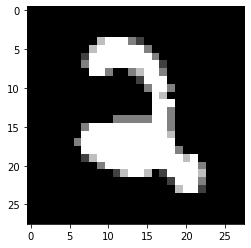

In [ ]:
def drawImage(image):
    img = image.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()

drawImage(pixel_test[10])

In [ ]:
Pred = knn(pixel_train, label_train, pixel_test[10])
print(int(Pred))

2


Checking the **Accuracy** of the Model

 

*   the variable 'len1' is used to store all the values of the labels.
*   'prediction[]' is an empty list which is used to store the value of the predicted label
*   'predict' stores the result of knn algorithm, if 'predict' and label_test value is same the accuracy becomes  'one' showing the model runs efficiently.
*    the accuracy is determined in percentage (%)



In [ ]:
len1 = (label_test.shape[0])
corr_pred = 0.0
prediction = []
for i in range (len1):
    predict = knn(pixel_train, label_train, pixel_test[i])
    if predict == label_test[i]:
        corr_pred = corr_pred + 1

# accuracy = correct_predictions/total_predictions
accuracy = corr_pred/len1

print(f"Accuracy of model : {accuracy*100}")

Accuracy of model : 98.6


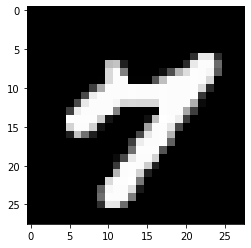

Predicted output : 7.0




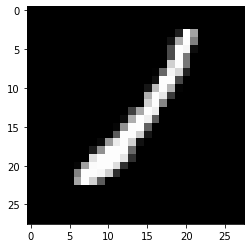

Predicted output : 1.0




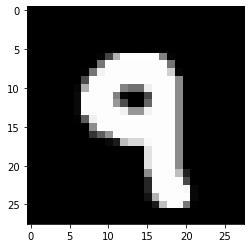

Predicted output : 9.0




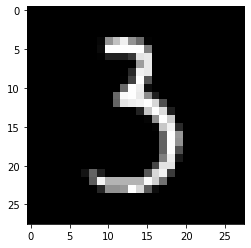

Predicted output : 3.0




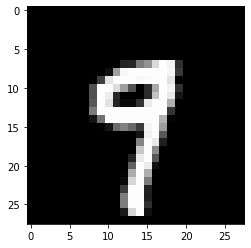

Predicted output : 9.0




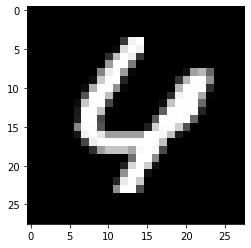

Predicted output : 4.0




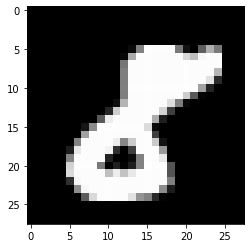

Predicted output : 8.0




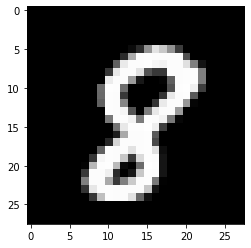

Predicted output : 8.0




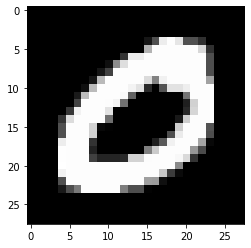

Predicted output : 0.0




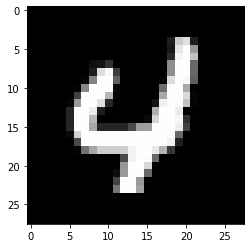

Predicted output : 4.0




In [ ]:
for i in range(10):
    output = knn(pixel_train, label_train, pixel_test[i])
    drawImage(pixel_test[i])
    print(f"Predicted output : {output}\n\n")